<h1>Pagamentos padrão de clientes de cartão de crédito em Taiwan (2005)</h1>

<h2>Introdução</h2>
<h4>Dataset</h4>
Este conjunto de dados contém informações sobre pagamentos padrão, fatores demográficos, dados de crédito, histórico de pagamentos e extratos de faturas de clientes de cartão de crédito em Taiwan, de abril de 2005 a setembro de 2005.

<h4>Variáveis:</h4>
<ul>
    <li><b>ID</b>: ID de cada cliente</li>
    <li><b>SEX</b>: Sexo (1 = homem, 2 = mulher)</li>
    <li><b>LIMIT_BAL</b>: montante do crédito concedido em dólares do NT (inclui crédito individual e familiar / suplementar</li>
    <li><b>EDUCATION</b>: (1 = pós-graduação, 2 = graduado, 3 = ensino médio completo, 4 = outros, 5 = desconhecido, 6 = desconhecido)</li>
    <li><b>MARRIAGE</b>: Estado civil (1 = casado, 2 = solteiro, 3 = outros)</li>
    <li><b>AGE</b>: Idade em anos</li>
    <li><b>PAY_0</b>: Status do pagamento em setembro de 2005 (-1 = pagamento devidamente, 1 = atraso no pagamento por um mês, 2 = atraso no pagamento por dois meses, ... 8 = atraso no pagamento por oito meses, 9 = atraso no pagamento por nove meses e acima)</li>
    <li><b>PAY_2</b>: status do pagamento em agosto de 2005 (escala igual à acima)</li>
    <li><b>PAY_3</b>: status do pagamento em julho de 2005 (escala igual à acima)</li>
    <li><b>PAY_4</b>: status do pagamento em junho de 2005 (escala igual à acima)</li>
    <li><b>PAY_5</b>: status do pagamento em maio de 2005 (escala igual à acima)</li>
    <li><b>PAY_6</b>: status do pagamento em abril de 2005 (escala igual à acima)</li>
    <li><b>BILL_AMT1</b>: valor do extrato da fatura em setembro de 2005 (dólar do NT)</li>
    <li><b>BILL_AMT2</b>: valor do extrato da fatura em agosto de 2005 (dólar do NT)</li>
    <li><b>BILL_AMT3</b>: valor do extrato da fatura em julho de 2005 (dólar do NT)</li>
    <li><b>BILL_AMT4</b>: valor do extrato da fatura em junho de 2005 (dólar do NT)</li>
    <li><b>BILL_AMT5</b>: valor do extrato da fatura em maio de 2005 (dólar do NT)</li>
    <li><b>BILL_AMT6</b>: valor do extrato da fatura em abril de 2005 (dólar do NT)</li>
    <li><b>PAY_AMT1</b>: valor do pagamento anterior em setembro de 2005 (dólar do NT)</li>
    <li><b>PAY_AMT2</b>: valor do pagamento anterior em agosto de 2005 (dólar do NT)</li>
    <li><b>PAY_AMT3</b>: valor do pagamento anterior em julho de 2005 (dólar do NT)</li>
    <li><b>PAY_AMT4</b>: valor do pagamento anterior em junho de 2005 (dólar do NT)</li>
    <li><b>PAY_AMT5</b>: valor do pagamento anterior em maio de 2005 (dólar do NT)</li>
    <li><b>PAY_AMT6</b>: valor do pagamento anterior em abril de 2005 (dólar do NT)</li>
    <li><b>default.payment.next.month</b>: pagamento padrão (1 = sim, 0 = não)</li>
</ul>

<h2>Importação de pacotes</h2>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import gc
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', 100)

<h2>Carregando a base de dados</h2>

In [2]:
dados = pd.read_csv('dados/UCI_Credit_Card.csv')

<h2>Verificando os dados</h2>

In [3]:
dados.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [5]:
dados.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Existem 30.000 clientes de cartão de crédito distintos.

O valor médio do valor do limite do cartão de crédito é 167.484. O desvio padrão é muito alto, sendo o valor máximo de 1 milhão.

O nível educacional é, principalmente, graduados e pós-graduados.

A maioria dos clientes são casados ou solteiros.

A idade média é de 35,5 anos, com desvio padrão de 9,2.

<h2>Procurando dados ausentes</h2>

In [6]:
total = dados.isnull().sum().sort_values(ascending = False)
porcentagem = (dados.isnull().sum()/dados.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, porcentagem], axis=1, keys=['Total', 'Percent']).transpose()

,default.payment.next.month,PAY_6,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,BILL_AMT1,PAY_AMT6,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,ID
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h2>Desequilibrio de Dados</h2>

In [7]:
#Verificar o desequilibrio dos dados a respeito da variável default.payment.next.month

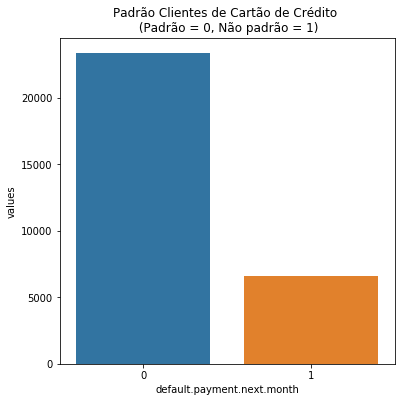

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

In [8]:
temp = dados["default.payment.next.month"].value_counts()
df = pd.DataFrame({'default.payment.next.month': temp.index,'values': temp.values})
plt.figure(figsize = (6,6))
plt.title('Padrão Clientes de Cartão de Crédito \n (Padrão = 0, Não padrão = 1)')
sns.set_color_codes("pastel")
sns.barplot(x = 'default.payment.next.month', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

dados["default.payment.next.month"].value_counts()

6.636 clientes em um universo de 30.000 (ou 22%) será inadimplente próximo mês.

<h2>Análise Exploratória</h2>

<h4>Limite de crédito</h4>

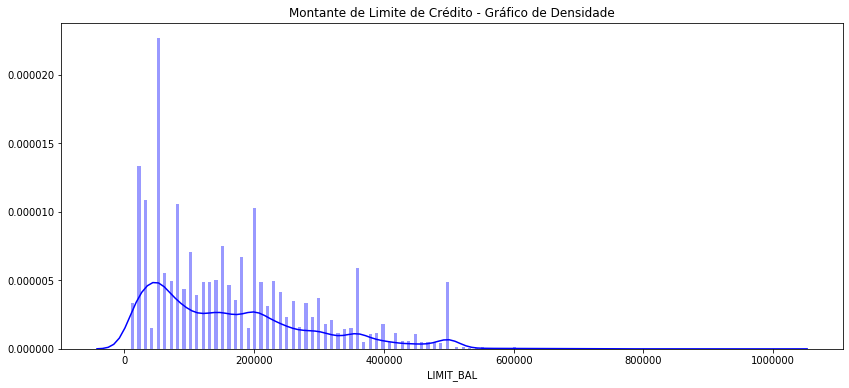

In [9]:
plt.figure(figsize = (14,6))
plt.title('Montante de Limite de Crédito - Gráfico de Densidade')
sns.set_color_codes("dark")
sns.distplot(dados['LIMIT_BAL'],kde=True,bins=200, color="blue")
plt.show()

O maior grupo, no que se refere a quantia de limite de crédito, é de aparentemente 50 mil.

In [10]:
dados['LIMIT_BAL'].value_counts().shape

(81,)

81 valores distintos para a variável LIMIT_BAL

In [11]:
dados['LIMIT_BAL'].value_counts().head(5)

50000.0     3365
20000.0     1976
30000.0     1610
80000.0     1567
200000.0    1528
Name: LIMIT_BAL, dtype: int64

O maior número de cartões de crédito possuem limite de 50,000 (3365 cartões), seguido pelo limite de 20,000 (1976 cartões) e 30,000 (1610).

<h4>Montante de limite de crédito agrupada pelo padrão de pagamento para o próximo mês.</h4>

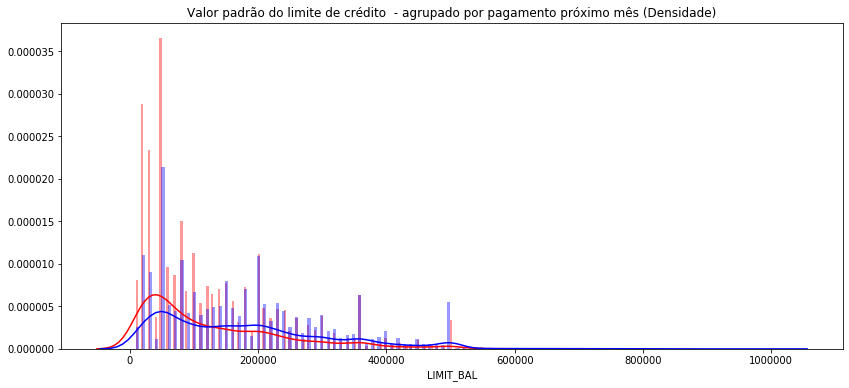

In [12]:
classe_0 = dados.loc[dados['default.payment.next.month'] == 0]["LIMIT_BAL"]
classe_1 = dados.loc[dados['default.payment.next.month'] == 1]["LIMIT_BAL"]
plt.figure(figsize = (14,6))
plt.title('Valor padrão do limite de crédito  - agrupado por pagamento próximo mês (Densidade)')
sns.set_color_codes("dark")
sns.distplot(classe_1,kde=True,bins=200, color="red")
sns.distplot(classe_0,kde=True,bins=200, color="blue")
plt.show()

A maioria dos padrões são para limites de crédito de 0 a 100.000.
Densidade para esse intervalo é maior para padrões do que não padrões.
A maioria dos padrões são para limites de 50.000, 20.000 e 30.000.


<h4>LIMITE DE CRÉDITO X SEXO</h4>

Sexo (1 = homem, 2 = mulher)

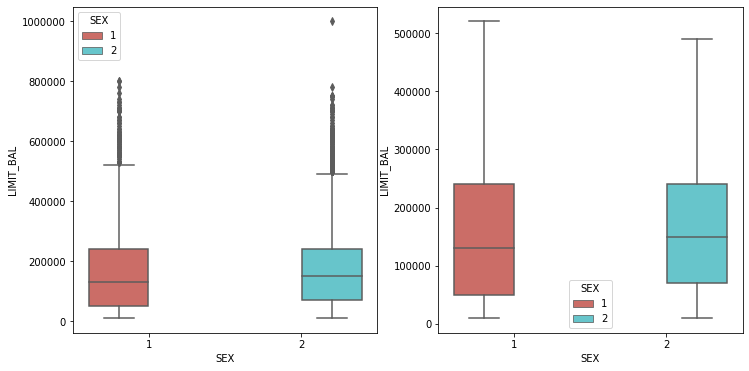

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="SEX", y="LIMIT_BAL", hue="SEX",data=dados, palette="hls",showfliers=True)
s = sns.boxplot(ax = ax2, x="SEX", y="LIMIT_BAL", hue="SEX",data=dados, palette="hls",showfliers=False)
plt.show();

O montante de limite de crédito é bem balanceada entre os sexos.

<h4>Correlações</h4>

Verificando a correlação da quantia do extrato da conta(BILL_AMT).

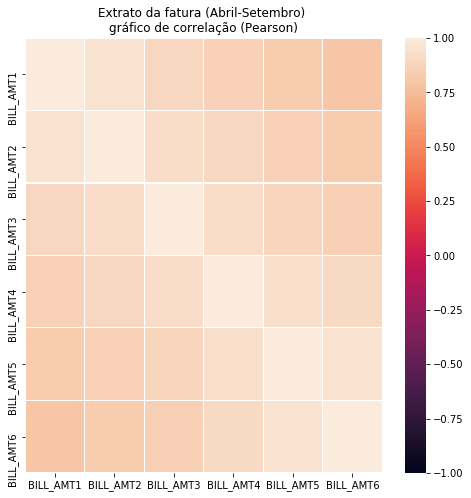

In [14]:
var = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

plt.figure(figsize = (8,8))
plt.title('Extrato da fatura (Abril-Setembro) \ngráfico de correlação (Pearson)')
corr = dados[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

A correlação diminui com a distância entre os meses. 
A menores correlações são entre setembro e abril.

Verificando a correlação da quantia de pagamento anterior(PAY_AMT)

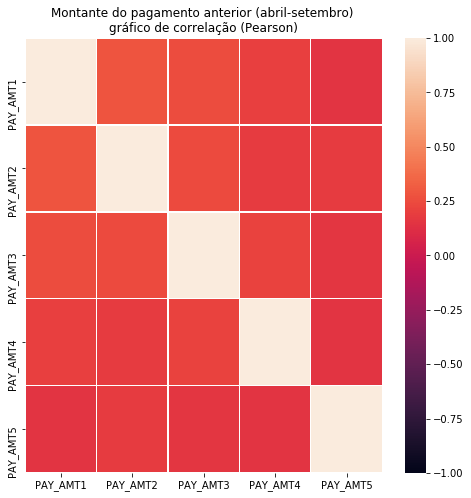

In [15]:
var = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5']

plt.figure(figsize = (8,8))
plt.title('Montante do pagamento anterior (abril-setembro) \ngráfico de correlação (Pearson)')
corr = dados[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

Não há correlação entre os pagamentos anteriores para abril-setembro 2005.

Verificando correlação entre os status de reembolsos(PAY).

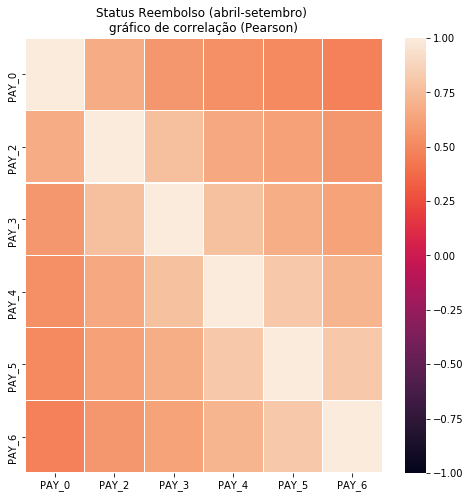

In [16]:
var = ['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

plt.figure(figsize = (8,8))
plt.title('Status Reembolso (abril-setembro) \ngráfico de correlação (Pearson)')
corr = dados[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

A correlação diminui com a distância entre os meses.


<h4>Distribuições para sexo, educação, idade e estado civil</h4>

boxplots com a distribuição etária agrupada por estado civil e sexo.

Estado Civil:

0 : desconhecido (considerar o status 'outros' também)
1 : casado
2 : solteiro
3 : outros

Sexo:

1 : homem
2 : mulher

In [17]:
def boxplot_variation(feature1, feature2, feature3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width,6))
    s = sns.boxplot(ax = ax1, x=feature1, y=feature2, hue=feature3,
                data=dados, palette="husl",showfliers=False)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show();

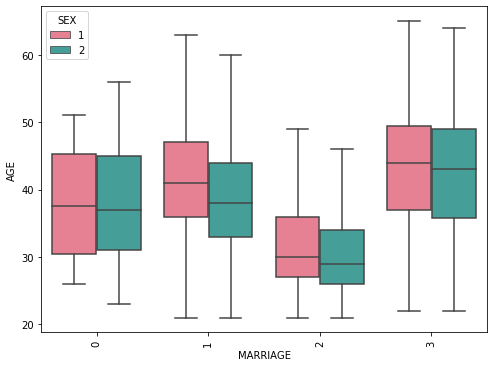

In [18]:
boxplot_variation('MARRIAGE','AGE', 'SEX',8)

Aparentemente o estado civil 3 (outros) com valores médios acima de 40 e Q4 acima de 60 significa, na maioria dos casos, viúvos ou divorciados. O estado civil 0 (desconhecido) “não pode ser especificado” ou “divorciado”, pois os valores de Q1 estão acima dos valores para casados de ambos os sexos.

Homens casados têm idade média acima de mulheres casadas. Homens solteiros têm um valor médio para a idade acima de mulheres solteiras, mas os valores são próximos. Os valores Q3 e Q4 para homens casados estão acima dos valores correspondentes para mulheres casadas.

...

Boxplots com a distribuição etária agrupada por educação e estado civil

<ul>
    <li>1 : Pós graduado</li>
    <li>2 : Graduado</li>
    <li>3 : Ensino Médio</li>
    <li>4 : Outros</li>
    <li>5 : Desconhecido</li>
    <li>6 : Desconhecido</li>
</ul>

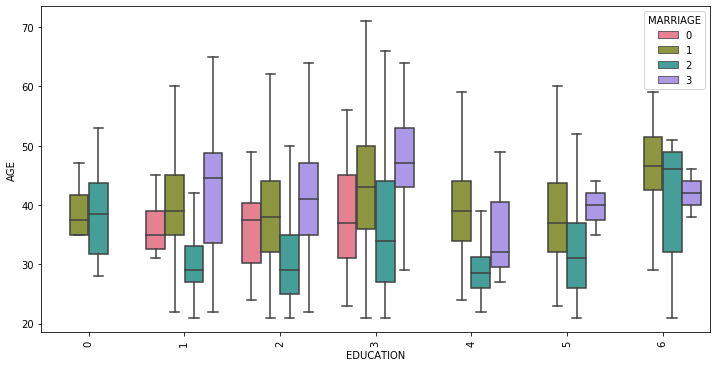

In [19]:
boxplot_variation('EDUCATION','AGE', 'MARRIAGE',12)

<h4>Idade, Sexo e Limite de Crédito</h4>

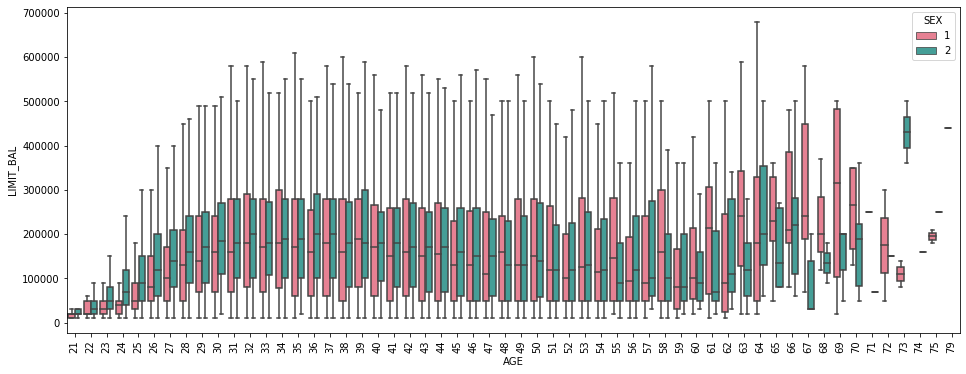

In [20]:
boxplot_variation('AGE','LIMIT_BAL', 'SEX',16)

Os valores médios de Q3 e Q4 aumentam para homens e mulheres com idade até cerca de 35 anos e depois oscilam e atingem um máximo de Q4 para homens com 64 anos.

Os valores médios são geralmente menores para homens que para mulheres, com poucas exceções, por exemplo, aos 39 anos, aos 48 anos de idade, até aproximadamente 60 anos, onde os valores médios para homens geralmente são maiores que para mulheres.

<h4>Estado Civil, Nível Educacional e Quantia de Limite de Crédito</h4>

Vamos ver os boxplots com distribuição de limite de valor de crédito agrupados por estado civil e nível educacional.

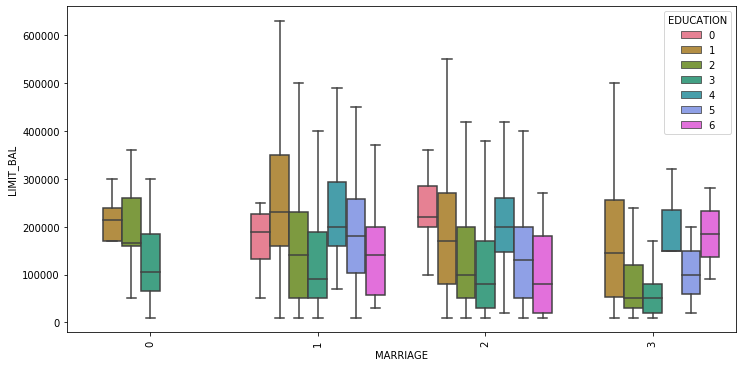

In [21]:
boxplot_variation('MARRIAGE','LIMIT_BAL', 'EDUCATION',12)

<h2>Modelo preditivo</h2>

<h4>Definindo parâmetros</h4>

Parâmetros para a análise do modelo.

In [22]:
RFC_METRIC = 'gini'  #métrica usada pelo RandomForrestClassifier
NUM_ESTIMATORS = 100 #número de estimadores usados pelo RandomForrestClassifier
NO_JOBS = 4 #número de trabalhos paralelos usados pelo RandomForrestClassifier

#VALIDAÇÃO
VALID_SIZE = 0.20 # validação simples usando train_test_split

RANDOM_STATE = 2018

<h4>Definir preditores e targets</h4>

Vamos definir os recursos preditores e os recursos de destino. Recursos categóricos, se houver, também são definidos. No nosso caso, não há recurso categórico.

In [23]:
target = 'default.payment.next.month'
predictors = [  'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 
                'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

<h4>Vamos definir conjuntos de treinamento e validação.</h4>

In [24]:
train_df, val_df = train_test_split(dados, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True )

E também fazer cópias de train_df e val_df para uso posterior.

In [25]:
train_df_bkp = train_df.copy()
val_df_bkp = val_df.copy()

<h2>RandomForestClassifier</h2>

Vamos executar um modelo usando o conjunto de treinamento e em seguida, usaremos o conjunto de validação.

<h2>Métricas</h2>

Usaremos como critério de validação GINI, cuja fórmula é GINI = 2 * (AUC) - 1, onde AUC é a característica operacional do receptor - área sob curva (ROC-AUC). O número de estimadores é definido como 100 e o número de tarefas paralelas é definido como 4.

In [26]:
clf = RandomForestClassifier(n_jobs=NO_JOBS, 
                             random_state=RANDOM_STATE,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)

Vamos treinar o RandonForestClassifier usando o train_df e fit.

In [27]:
clf.fit(train_df[predictors], train_df[target].values)

RandomForestClassifier(n_jobs=4, random_state=2018, verbose=False)

Vamos agora prever os valores de destino para os dados val_df, usando a função de previsão.

In [28]:
preds = clf.predict(val_df[predictors])

Vamos também visualizar a importância as variáveis.

<h4>Variáveis</h4>

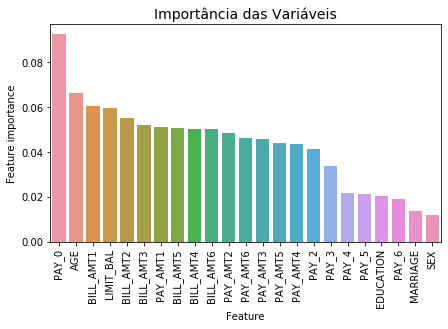

In [29]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Importância das Variáveis',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

As variáveis mais importantes são PAY_0, IDADE, BILL_AMT1, LIMIT_BAL, BILL_AMT2, BILL_AMT3.

<h2>Matriz de confusão</h2>

Matriz de confusão e os resultados obtidos.

cm = pd.crosstab(val_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Matriz de confusão', fontsize=14)
plt.show()

Vamos calcular também a área sob a curva (característica do operador receptor).

In [30]:
roc_auc_score(val_df[target].values, preds)

0.6625018741566295

A pontuação ROC-AUC obtida com o RandomForrestClassifier é 0,66.

<h2>Conclusão</h2>

Usando o RandomForrestClassifier obtivemos uma acurácia de 0,66 de acordo com o parámetro AUC.

<h2>Referências</h2>

Default Credit Card Clients Dataset, https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset/

RandomForrestClassifier, http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

ROC-AUC characteristic, https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_the_curve